# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Detección y Reconocimiento Facial</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>
1. [TensorFlow 1 Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf1_detection_zoo.md#mobile-models)
2. [TensorFlow 2 Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md)
3. [Reconocimiento Facial con Machine Learning en PYTHON (Tutorial)](https://www.youtube.com/watch?v=fnV6r26uBSs&list=PL9E7H1rzXKFKV9XIXBxwlgubk_2EZMrcB&index=7)
4. [Tutoriales en Colab](https://github.com/tensorflow/models/tree/master/research/object_detection/colab_tutorials)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Detección](#Detección)
* [Reconocimiento](#Reconocimiento)
* [Importar Librerías Necesarias](#Importar-Librerías-Necesarias)

## <span style="color:blue">Introducción</span>

Qué es el detección y reconocimiento facial.

Pasos a seguir.

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Detección</span>

Qué es la detección facial.

Detectar las ubicaciones donde hay rostros

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Importar Librerías Necesarias</span>

In [1]:
# importar tensorflow
import tensorflow as tf
# Módul de keras para preprocesamiento
from tensorflow.keras.models import load_model
# Dibujitos
import matplotlib.pyplot as plt
# Manipular tensores
import numpy as np
# Acceder a datos en internet
import requests
# OpenCV para manipulación de imágenes
import cv2
# Manejo de archivos
import os

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Leer Grafo</span>

Podemos bajarnos el grafo del modelo del siguiente link:

[Frozen Inference Graph Face](https://github.com/yeephycho/tensorflow-face-detection/blob/master/model/frozen_inference_graph_face.pb)

In [2]:
# Directorio del modelo
mnet_dir = '../Modelos/frozen_inference_graph_face.pb'

# Leer grafo de MobileNet
with tf.io.gfile.GFile(mnet_dir,'rb') as f:
    # Debemos usar tf v1
    graph_def=tf.compat.v1.GraphDef()
    # Leer Datos Binarios
    graph_def.ParseFromString(f.read())
    
# Crear grafo usando tensorflow
with tf.Graph().as_default() as mnet:
    tf.import_graph_def(graph_def,name='')

In [3]:
print(mnet)

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Cargar Imágenes</span>

Haremos tres directorios:

- Conocidos:
- Desconocidos:
- Resultados:

In [4]:
conocidos_dir    = '../Rostros/Conocidos/'
desconocidos_dir = '../Rostros/Desconocidos/'
resultados_dir   = '../Rostros/Resultados/'

# exist_ok=True No genera error si ya existen las carpetas
os.makedirs(conocidos_dir, exist_ok=True)
os.makedirs(desconocidos_dir, exist_ok=True)
os.makedirs(resultados_dir, exist_ok=True)

Hagamos una función que cargue la imagen:

In [5]:
def cargar_imagen(directorio, nombre):
    return cv2.cvtColor(cv2.imread(f'{directorio}/{nombre}'),cv2.COLOR_BGR2RGB)

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Detectar Caras</span>

MobileNet detectará los bounding boxes

In [6]:
def detectar_caras(imagen,umbral_prob=0.7):
    
    # Obtener ancho y alto de imagen
    (alto,ancho) = imagen.shape[:-1]
    #print(f'La imagen es {ancho}x{alto}')
    
    # Forma de lotes de datos
    img = np.expand_dims(imagen,axis=0)
    
    # Inicializar MobileNet
    sess = tf.compat.v1.Session(graph=mnet)
    img_tensor = mnet.get_tensor_by_name('image_tensor:0')
    cajas = mnet.get_tensor_by_name('detection_boxes:0')
    probs = mnet.get_tensor_by_name('detection_scores:0')
    
    # Predicción (Detección de cajas y probabilidades asociadas)
    (cajas,probs) = sess.run([cajas,probs], feed_dict={img_tensor:img})
    
    # Reajustar tamaños de cajas
    cajas = np.squeeze(cajas,axis=0)
    probs =  np.squeeze(probs,axis=0)
    #print(probs)
    
    # Depurar Bounding Boxes
    idx = np.where(probs>=umbral_prob)[0]
    #print(idx)
    
    # Crear Bounding Box Para Dibujar
    bcajas = []
    # Recojer solo las cajas con alta probabilidad
    for index in idx:
        ymin, xmin, ymax, xmax = cajas[index,:]
        #Opencv no acepta coordenadas, solo acepta resultados en pixeles
        (left, right, top, bottom) = (xmin*ancho, xmax*ancho, ymin*alto, ymax*alto)
        # convetir a números enteros
        left, right, top, bottom = int(left), int(right), int(top), int(bottom)
        bcajas.append([left,right,top,bottom])
        
    return bcajas

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Dibujar Bounding Boxes</span>

In [7]:
def dibujar_caja(imagen,caja,color,ancho_linea=6):
        cv2.rectangle(imagen, (caja[0],caja[2]),(caja[1],caja[3]),color,ancho_linea)
        return imagen

[[Volver al Inicio]](#Contenido)

### <span style="color:blue">Tests</span>

In [8]:
conocidos = os.listdir(conocidos_dir)
desconocidos = os.listdir(desconocidos_dir)
print(conocidos)
print(desconocidos)

['Dani3.jpg', 'Dani1.jpg', 'Dani4.jpg', 'Dani2.jpg', '.ipynb_checkpoints', 'Dani5.jpg']
['batman2.jpg', 'women1.jpg', 'zim1.jpg', '.ipynb_checkpoints', 'batman1.png', 'Dani6.jpg', 'Dani7.jpg', 'women2.jpg']


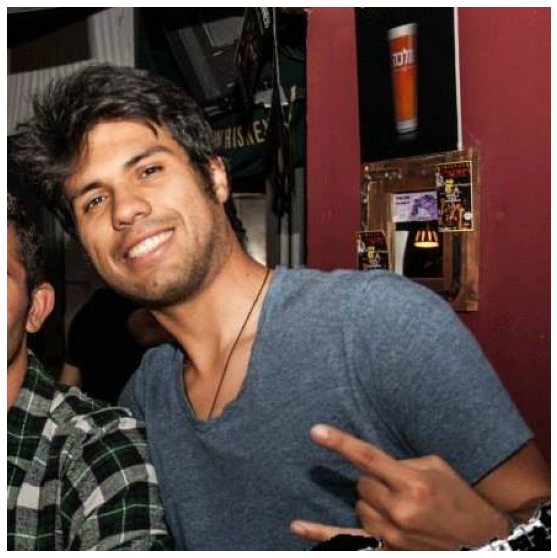

¡1 Rostro(s) Detectado(s)!


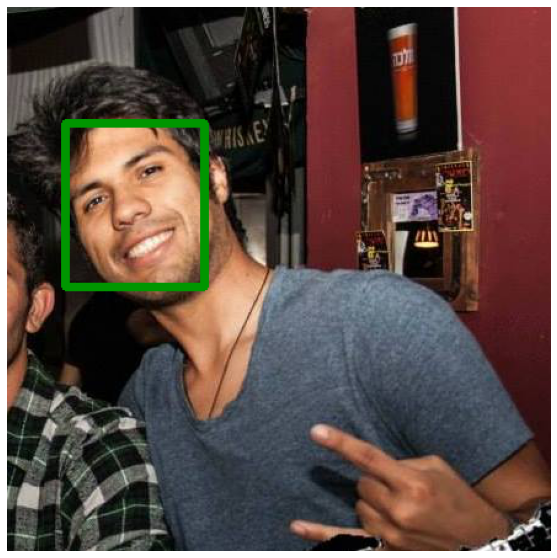

In [9]:
# Nombre de la imagen
nombre = conocidos[0]
# Cargar Imagen
imagen = cargar_imagen(conocidos_dir,nombre)

# Imagen Original
plt.figure(figsize=(15,10))
plt.imshow(imagen)
plt.axis('off')
plt.show()

# Detectar Rostros
bcajas = detectar_caras(imagen)

# Dibujar Cajas de Reconocimiento

if bcajas==[]:
    # Modelo No reconoce cajitas
    reconocidas = imagen
    print("No se detectaron rostros.")
else:
    for cajita in bcajas:
        reconocidas = dibujar_caja(imagen,cajita,color = (0,150,0))
    print(f"¡{len(bcajas)} Rostro(s) Detectado(s)!")

# Dibujar resultado

plt.figure(figsize=(15,10))
plt.imshow(reconocidas)
plt.axis('off')
plt.show()

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Reconocimiento</span>

Qué es el reconocimiento facial.

Tomar las imágenes y determinar a qué personas correspoden las mismas.

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Extraer Rostros</span>

In [10]:
# FaceNet Requiere imágenes 96x96
def extraer_caras(imagen, bcajas, nuevas_dim=(96,96)):
    # Lista Vacia para rostros
    solo_caras = []
    # Tomar cada cara detectada
    for cajitas in bcajas:
        # Separar coordenadas en pixeles
        left, right, top, bottom = cajitas
        # Cortar imagen usando componentes
        cara = imagen[top:bottom, left:right]
        # Agregar cada rostro detectado a la lista
        solo_caras.append(cv2.resize(cara,dsize=nuevas_dim))
        
    return solo_caras

## <span style="color:blue">Test</span>

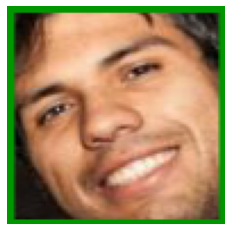

In [12]:
rostros = extraer_caras(imagen,bcajas)
plt.imshow(rostros[0])
plt.axis('off')
plt.show()

## <span style="color:blue">Usando FaceNet</span>

El modelo puede ser bajado desde aquí:

[FaceNet Model (Arq + Weights)](https://drive.google.com/drive/folders/1pwQ3H4aJ8a6yyJHZkTwtjcL4wYWQb7bn)

In [13]:
facenet = load_model('facenet_keras.h5')

ValueError: bad marshal data (unknown type code)

El archivo tiene problemas de lectura.

Workaround:
[ValueError: bad marshal data (unknown type code)](https://github.com/iwantooxxoox/Keras-OpenFace/issues/2)

Luego de esto, es necesario hacer las siguientes modificaciones en todos los `.py`:

keras -> tensorflow.keras

y todo lo que diga

keras.layers.* -> tensorflow.keras

In [13]:
%cd research-papers/facenet
from model import create_model
%cd ../..
#check if '%pwd' prints '/content' if using google colab
#download facenet_keras.py and upload to your colab's 'content/' direcory #https://gist.github.com/tkwoo/a9da631b3f7d437b8961a7d5276a6087

import facenet_keras
facenet = facenet_keras.facenet()
facenet.load_weights('./research-papers/facenet/weights/nn4.small2.v1.h5')

/home/alvaro/Documents/2021-1/UN/Diplomado UN/Tensorflow/ANN/TL/Cuadernos/research-papers/facenet
/home/alvaro/Documents/2021-1/UN/Diplomado UN/Tensorflow/ANN/TL/Cuadernos


In [14]:
# Forma de Entrada
print(facenet.input_shape)
# Forma de Salida
print(facenet.output_shape)

(None, 96, 96, 3)
(None, 128)


## <span style="color:blue">Embedding</span>

In [15]:
def hacer_embedding(modelo,cara):
    # Se hará un embedding a 128
    cara = cara.astype('float32')
    # Normalizando rostro
    mean, std = cara.mean(), cara.std()
    cara = (cara-mean)/std
    # Forma de Lote
    cara = np.expand_dims(cara, axis=0)
    # Usar Facenet
    embedding = modelo.predict(cara)
    
    return embedding

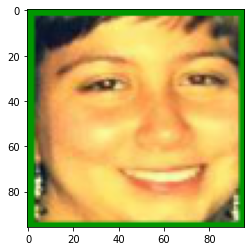


Forma de Embedding: (1, 128) 

[[-0.06467454  0.0848465  -0.03767982  0.06834547  0.09932425  0.14075208
  -0.0027087  -0.13710669  0.03988078 -0.06317926 -0.00071868 -0.00859093
   0.03148882 -0.03636891  0.02523541 -0.02940289 -0.08278803  0.10967962
  -0.13254763  0.13239998  0.05647876 -0.13573003  0.14257573  0.05409978
   0.03732698 -0.14353065 -0.20604917 -0.14727914 -0.05550167 -0.01512242
   0.19454567  0.06247059 -0.00287199  0.04603245  0.09439785  0.18163513
  -0.00704059  0.07775819 -0.13276425 -0.10321289  0.09617417 -0.01089005
   0.01246067  0.05208132 -0.15716618 -0.0190647   0.13319309  0.08704842
  -0.04133162  0.09827022 -0.12473101 -0.11924281 -0.01917337 -0.03564134
   0.08538827  0.04611744 -0.05751326  0.07199974  0.03871649 -0.10834753
  -0.16718364  0.10638171  0.1132841  -0.19479078  0.14640011  0.00531792
   0.00570126 -0.01997068 -0.1448883   0.15224816  0.05705373  0.10589226
   0.01900327  0.03351971  0.00594792 -0.0259933  -0.08262968  0.05095253
  -0.0

In [16]:
plt.imshow(rostros[0])
plt.show()
embedding = hacer_embedding(facenet,rostros[0])
print("\nForma de Embedding:",embedding.shape,'\n')
print(embedding)

## <span style="color:blue">Embeddings de Referencia</span>

In [17]:
emb_conocidos = []

print('\nProcesando Rostros conocidos...\n')
for nombre in conocidos:
    if nombre.endswith('.jpg'):
        print(f'{nombre}')
        imagen = cargar_imagen(conocidos_dir,nombre)
        bcajas = detectar_caras(imagen,umbral_prob=0.03)
        rostros = extraer_caras(imagen,bcajas)
        emb_conocidos.append(hacer_embedding(facenet,rostros[0]))


Procesando Rostros conocidos...

Dani3.jpg
Dani1.jpg
Dani4.jpg
Dani2.jpg
Dani5.jpg


In [18]:
print("Número de embeddings Conocidos:",len(emb_conocidos))

Número de embeddings Conocidos: 5


## <span style="color:blue">Comparar Rostros</span>

In [19]:
def comparar_rostros(embs_ref, emb_desc, umbral=0.4):
    
    distancias = []
    
    for emb_ref in embs_ref:
        # Calcular la norma entre los dos tensores 1D
        distancias.append(np.linalg.norm(emb_ref-emb_desc))
    # Convertir distancias a arreglos
    distancias = np.array(distancias)
    # Devovler True o False dependiendo del umbral para cada embedding
    return distancias, list(distancias<=umbral)

## <span style="color:blue">Reconocimiento de Rostros</span>

In [20]:
print('\nProcesando Rostros Desconocidos...\n')

for nombre in desconocidos:
    if nombre.endswith('.jpg'):
        print(f'{nombre}')
        imagen = cargar_imagen(desconocidos_dir,nombre)
        bcajas = detectar_caras(imagen,umbral_prob=0.7)
        rostros = extraer_caras(imagen,bcajas)
        
        # Por cada rostro, calcular embedding
        img_cajas = imagen.copy()
        
        for rostro, cajita in zip(rostros,bcajas):
            
            emb = hacer_embedding(facenet,rostro)
            
            d, reconocimiento = comparar_rostros(emb_conocidos,emb)
            #print(d)
            if any(reconocimiento):
                print("Hay un Match!!!!")
                im_cajas = dibujar_caja(img_cajas,cajita,(0,255,0))
            else:
                im_cajas = dibujar_caja(img_cajas,cajita,(255,0,0))
            
            cv2.imwrite(f'{resultados_dir}/{nombre}',cv2.cvtColor(im_cajas,cv2.COLOR_RGB2BGR))

print('\n¡Finalizado!')


Procesando Rostros Desconocidos...

batman2.jpg
women1.jpg
zim1.jpg
Dani6.jpg
Dani7.jpg
Hay un Match!!!!
women2.jpg

¡Finalizado!
